## Import the data and create a dataframe

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df: pd.DataFrame = pd.read_csv('merged_data.csv')

missing_values = df.isnull().sum()
print(missing_values)

df.dropna(inplace=True)
missing_values = df.isnull().sum()
print(f"\n\nmissing data : \n{missing_values}")

df['total_markdown'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

df['Weekly_Sales']

Store            0
Dept             0
Date             0
Weekly_Sales     0
IsHoliday        0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Type             0
Size             0
Description     16
HolidayNames     0
dtype: int64


missing data : 
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Description     0
HolidayNames    0
dtype: int64


0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421554, dtype: float64

## Label the data from Weekly Sales

In [9]:
bins = [-5000, 0, 10000, 50000, 100000, 500000, 1000000]
labels = ['Negative', 'Small', 'moderate', 'medium', 'high', 'large']

df['Weekly_Sales_name'] = pd.cut(df['Weekly_Sales'], bins=bins, labels=labels)

for word in labels:
    df[word + '_count'] = df['Weekly_Sales_name'].str.count(word)

total_counts = df[[word + '_count' for word in labels]].sum()

print(total_counts)

Negative_count      1358
Small_count       238571
moderate_count    149441
medium_count       27044
high_count          5136
large_count            4
dtype: int64


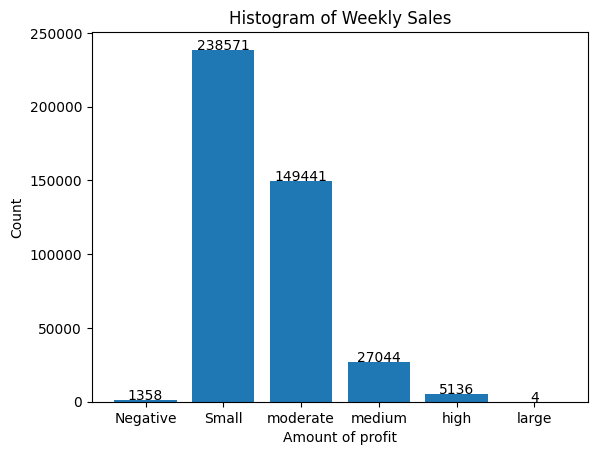

In [10]:
plt.bar(labels, total_counts, align='center')
plt.xlabel('Amount of profit')
plt.ylabel('Count')
for index, value in enumerate(total_counts):
    plt.text(index, value, str(value), horizontalalignment='center')
plt.title('Histogram of Weekly Sales')
plt.show()

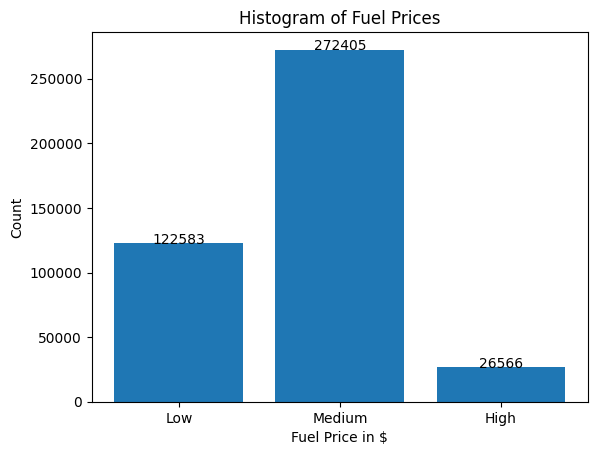

In [11]:
bins = [2, 3, 4, np.inf]
labels = ['Low', 'Medium', 'High']

df['Fuel_Price_Name'] = pd.cut(df['Fuel_Price'], bins=bins, labels=labels)

for word in labels:
    df[word + '_count'] = df['Fuel_Price_Name'].str.count(word)

total_counts = df[[word + '_count' for word in labels]].sum()

plt.bar(labels, total_counts, align='center')
plt.xlabel('Fuel Price in $')
plt.ylabel('Count')
for index, value in enumerate(total_counts):
    plt.text(index, value, str(value), horizontalalignment='center')
plt.title('Histogram of Fuel Prices')
plt.show()

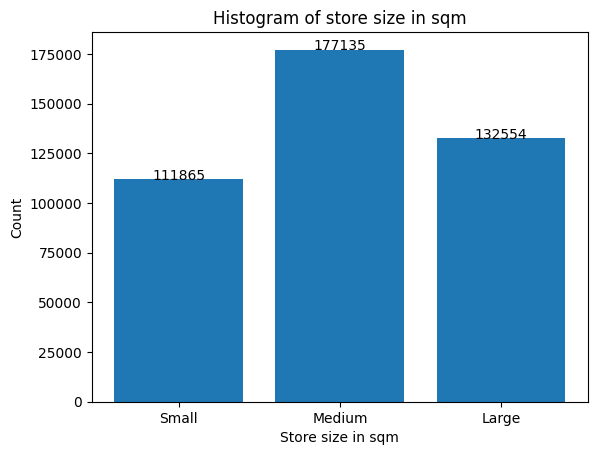

In [12]:
bins = [0, 100000, 200000, np.inf]
labels = ['Small', 'Medium', 'Large']

df['Store_Size_Named'] = pd.cut(df['Size'], bins=bins, labels=labels)

for word in labels:
    df[word + '_count'] = df['Store_Size_Named'].str.count(word)

total_counts = df[[word + '_count' for word in labels]].sum()

plt.bar(labels, total_counts, align='center')
plt.xlabel('Store size in sqm')
plt.ylabel('Count')
for index, value in enumerate(total_counts):
    plt.text(index, value, str(value), horizontalalignment='center')
plt.title('Histogram of store size in sqm')
plt.show()

## Create a linear model

In [13]:
model = LinearRegression()

x = df[['Weekly_Sales']]
y = df['Weekly_Sales']

model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:')
for feature, coefficient in zip(x.columns, coefficients):
    print(f"{feature}: {coefficient:.2f}")
print(f'Intercept: {intercept:.2f}')

Coefficients:
Weekly_Sales: 1.00
Intercept: -0.00


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  

# Create a linear regression 
model = LinearRegression() 

# Fit the model to the training 
model.fit(x, y) 
# Make predictions on the test 
y_pred = model.predict(x) 

# Evaluate the model's 
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

df.to_csv('new_merged_data.csv')

Mean Squared Error: 8.514719010379496e-19
